<a href="https://colab.research.google.com/github/villafue/Capstone_1-_Predict_House_Prices/blob/master/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello! This is my first Data Science Project. It is also my first Capstone project with Springboard. I'll focus on the business aspect. I created a scenario where I'm trying to convince the Ames company to hire me and hire a data science team, in other words, to convince them that Data Science is valuable for their business model. To that end, I will do my best to keep it simple, marketable, and executable for the company. 

Last, I am thankful for the plethora of notebooks that others were kind enough to share on Kaggle. I adapted many of their codes and processes in my notebook. I'll credit them here:

1. [Comprehensive Data Exploration with Python - Pedro Marcelino, Feb 2017](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
  - He did amazing EDA and helped me to learn as he told a story throughout the process.

2. [Stacked Regressions: Top 4% on LeaderBoard - Serigne, July 2017](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)
  - I really liked his data cleaning and imputing process. He described the logic behind what he did, and he also cleaned both the train and test set together (as did others).

3. [House Price Calculation methods for beginners - Bsivavenu, 2018](https://www.kaggle.com/bsivavenu/house-price-calculation-methods-for-beginners)
  - I used parts of his EDA especially for visualizing SalesPrice.

4. [#1 House Prices Solution (top 1%) - Jesuscristo (Nanashi), 2019](https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1?scriptVersionId=20214677)
  - I used parts of his EDA for more detailed analysis

5. [Comprehensive Feature Engineering Tutorial - Pavan Sanagapati, 30 August 2020 ](https://www.kaggle.com/pavansanagapati/comprehensive-feature-engineering-tutorial)
  - Although not related to this specific dataset, his notebook was a big help in explaining the feature engineering in other people's notebooks.

First, I import my standard modules and settings.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display
pd.set_option('display.notebook_repr_html', True)
# I want to see all the columns in my output.
pd.set_option('max_columns', 82)
%matplotlib inline
pd.options.display.max_rows = 100

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The following code make's plots viewable in Colab's darkmode.

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use(['seaborn-whitegrid'])

I'll change my home directory because this is where I upload files, from my computer, into Colab.

In [3]:
os.chdir('sample_data')

I import the train and test files directly from my Github. I also print out the head and shapes so can take a quick look at the data. 

In [4]:
url = 'https://raw.githubusercontent.com/villafue/Capstone_1-_Predict_House_Prices/master/Data/test.csv'
test = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/villafue/Capstone_1-_Predict_House_Prices/master/Data/train.csv'
train = pd.read_csv(url)
print(test.shape, train.shape, '\n' * 2, 'Train has: ', train.shape[0], 'rows and ', train.shape[1], 'columns.', '\n', 
      'Test has: ', test.shape[0], 'rows and ', test.shape[1], 'columns.')
# This makes a little barrier between printed outputs.
print('\n', '=' * 200, '\n' * 2, 'Train Set:', '\n')
display(train.head())
print('\n', '=' * 200, '\n' * 2, 'Test Set:', '\n')
test.head()

(1459, 80) (1460, 81) 

 Train has:  1460 rows and  81 columns. 
 Test has:  1459 rows and  80 columns.


 Train Set: 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000




 Test Set: 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


I want to see the column names. Train and test have the column names except the latter does not have the price column.

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

I'm going to save the "ID" columns and then drop them from the dataframes as they're unnecessary for modeling. 

Here is a helpful link for ".format" and strings. [Python Format Function](https://www.geeksforgeeks.org/python-format-function/#:~:text=Diamond%20star%20pattern-,Python%20%7C%20format()%20function,a%20string%20through%20positional%20formatting.)

In [6]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("The train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


I will concatenate the train and test sets into one dataframe so I can study and clean it. 

In [7]:
# I don't know why I'm saving the shapes of train and test
ntrain = train.shape[0]
ntest = test.shape[0]
# I guess this is because I'm going to use this for y-train later
y_train = train.SalePrice.values

all = pd.concat((train, test)).reset_index(drop=True)
all.drop(['SalePrice'], axis=1, inplace=True)
print("The full data size is : {}".format(all.shape))

The full data size is : (2919, 79)


I want to see the count of non-null values and if the columns are numeric or categorical.

In [8]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

I want to see which columns have categorical features (strings).

In [9]:
all_object = [f for f in all.columns if all.dtypes[f] == 'object']
all_object = pd.DataFrame(all_object)
all_object.rename(columns={0: 'Object_Type'}, inplace=True)
all_object

,Object_Type
0,MSZoning
1,Street
2,Alley
3,LotShape
4,LandContour
5,Utilities
6,LotConfig
7,LandSlope
8,Neighborhood
9,Condition1


I want to see which columns are numerical (ints and floats).

In [10]:
all_numeric = [f for f in all.columns if all.dtypes[f] != 'object']
all_numeric = pd.DataFrame(all_numeric)
all_numeric.drop([0], inplace=True)
all_numeric.rename(columns={0: 'Numeric_Type'}, inplace=True)
all_numeric.reset_index(inplace=True)
all_numeric.drop(columns='index', inplace=True)
all_numeric

,Numeric_Type
0,LotFrontage
1,LotArea
2,OverallQual
3,OverallCond
4,YearBuilt
5,YearRemodAdd
6,MasVnrArea
7,BsmtFinSF1
8,BsmtFinSF2
9,BsmtUnfSF


I want to see how many unique values exist in my dataframe.

In [11]:
all.nunique().sort_values(ascending=False)

LotArea          1951
GrLivArea        1292
BsmtUnfSF        1135
1stFlrSF         1083
TotalBsmtSF      1058
BsmtFinSF1        991
2ndFlrSF          635
GarageArea        603
MasVnrArea        444
WoodDeckSF        379
BsmtFinSF2        272
OpenPorchSF       252
EnclosedPorch     183
LotFrontage       128
ScreenPorch       121
YearBuilt         118
GarageYrBlt       103
YearRemodAdd       61
MiscVal            38
LowQualFinSF       36
3SsnPorch          31
Neighborhood       25
Exterior2nd        16
MSSubClass         16
Exterior1st        15
PoolArea           14
TotRmsAbvGrd       14
MoSold             12
OverallQual        10
OverallCond         9
Condition1          9
SaleType            9
BedroomAbvGr        8
Condition2          8
HouseStyle          8
RoofMatl            8
Functional          7
Foundation          6
BsmtFinType1        6
RoofStyle           6
BsmtFinType2        6
SaleCondition       6
Heating             6
GarageCars          6
GarageType          6
Fireplaces

I want to see the percent of unique values per column.

In [12]:
all.nunique().sort_values(ascending=False)/all.shape[0] * 100

LotArea          66.837958
GrLivArea        44.261733
BsmtUnfSF        38.883179
1stFlrSF         37.101747
TotalBsmtSF      36.245289
BsmtFinSF1       33.949983
2ndFlrSF         21.754025
GarageArea       20.657760
MasVnrArea       15.210689
WoodDeckSF       12.983899
BsmtFinSF2        9.318260
OpenPorchSF       8.633094
EnclosedPorch     6.269270
LotFrontage       4.385063
ScreenPorch       4.145255
YearBuilt         4.042480
GarageYrBlt       3.528606
YearRemodAdd      2.089757
MiscVal           1.301816
LowQualFinSF      1.233299
3SsnPorch         1.062008
Neighborhood      0.856458
Exterior2nd       0.548133
MSSubClass        0.548133
Exterior1st       0.513875
PoolArea          0.479616
TotRmsAbvGrd      0.479616
MoSold            0.411100
OverallQual       0.342583
OverallCond       0.308325
Condition1        0.308325
SaleType          0.308325
BedroomAbvGr      0.274066
Condition2        0.274066
HouseStyle        0.274066
RoofMatl          0.274066
Functional        0.239808
F

I'm going to transform some numerical variables into strings because they are really categorical variables. If I keep them numeric, then the model will treat them as continuous variables.

In [13]:
# # MSSubClass: Identifies the type of dwelling involved in the sale.
# all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


# # OverallCond: Rates the overall condition of the house
# all_data['OverallCond'] = all_data['OverallCond'].astype(str)


# # Year (YYYY) and month (MM) sold are transformed into categorical features.
# all_data['YrSold'] = all_data['YrSold'].astype(str)
# all_data['MoSold'] = all_data['MoSold'].astype(str)

# # GarageYrBlt: Year garage was built
# all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)



I want to see the summary statistics of each numeric column. Some of these columns are categorical and coded as numerical, but I'll deal with them later.

In [14]:
all.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


I want to visualize the missing values in my data.

Text(0.5, 1.0, 'Percent missing data by feature')

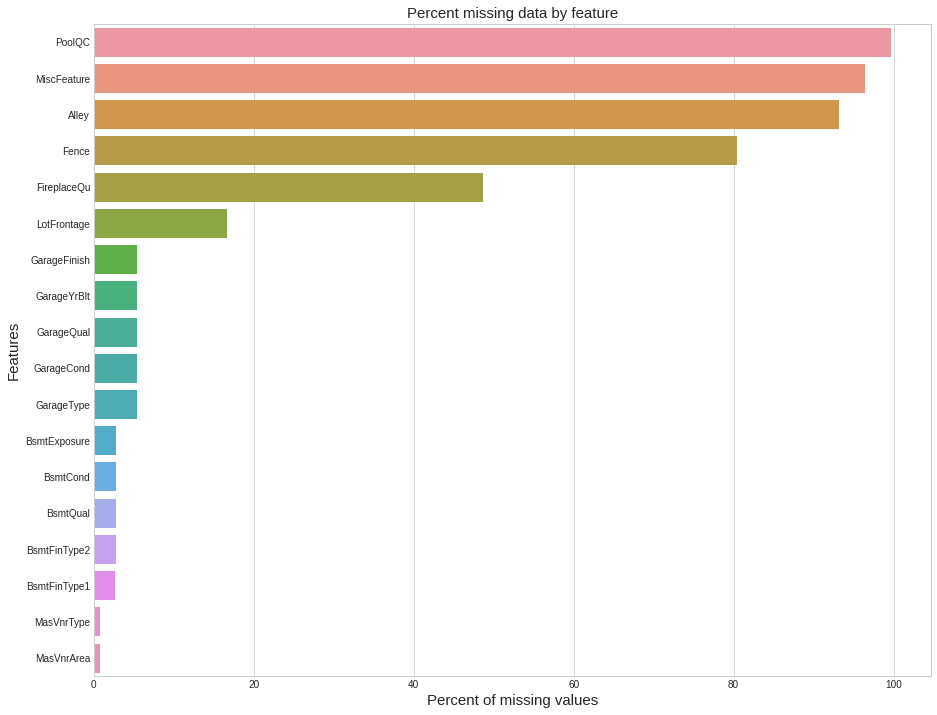

In [15]:
all_na = (all.isnull().sum() / len(all)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:18]
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks()
sns.barplot(x=all_na, y=all_na.index, orient="h")
plt.xlabel('Percent of missing values', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

I want a more detailed look at my missing values.

In [16]:
total = all.isnull().sum().sort_values(ascending=False)
percent = (all.isnull().sum()/all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


The following cells are imputations of the missing values. 
When a variable does not have it's respective feature, I used "None" value  for categorical features and "0" for numerical features. This is because N/A does not work for some computations and models.
"Data Description Text file" is abbreviated to DDTF. 

**PoolQC**: DDTF says NA means "No Pool". This makes sense as most homes probably do not have pools.

In [17]:
all["PoolQC"] = all["PoolQC"].fillna("None")

**MiscFeature**: DDTF says NA means "no misc feature". 

In [18]:
all["MiscFeature"] = all["MiscFeature"].fillna("None")

**Alley**: DDTF says NA means "no alley access".

In [19]:
all["Alley"] = all["Alley"].fillna("None")

**Fence**: DDTF data description says NA means "no fence".

In [20]:
all["Fence"] = all["Fence"].fillna("None")

**FireplaceQu**: DDTF says NA means "no fireplace".

In [21]:
all["FireplaceQu"] = all["FireplaceQu"].fillna("None")

**LotFrontage**: I imputed using the median as the area of the connecting street, to the property, should be similar to other homes in it's neighborhood. 

In [22]:
all["LotFrontage"] = all.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

**GarageType, GarageFinish, GarageQual, GarageCond**: Replaced missing data with None as NA means "no garage".

In [23]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all[col] = all[col].fillna('None')

**GarageYrBlt, GarageArea and GarageCars**: I replace the missing data with 0 because no garage = no cars. 

HOWEVER, I will keep GarageYrBlt in mind as imputing with a year of 0 does not make sense.

In [24]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all[col] = all[col].fillna(0)

**BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath**: missing values are likely 0 for having no basement.

HOWEVER, it bothers me having 0 instead of NaN for numeric features.

In [25]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all[col] = all[col].fillna('None')

**BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2**: For all these categorical basement-related features, NaN means no basement.

In [26]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all[col] = all[col].fillna('None')

**MasVnrArea and MasVnrType**: I'll fill in None for no masonry veneer and 0 for the area. However, I still disagree with this.

In [27]:
all["MasVnrType"] = all["MasVnrType"].fillna("None")
all["MasVnrArea"] = all["MasVnrArea"].fillna(0)

**MSZoning (The general zoning classification)**: 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [28]:
all['MSZoning'] = all['MSZoning'].fillna(all['MSZoning'].mode()[0])

**Utilities**: For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . I will impute the missing values with its mode of "AllPub."

In [29]:
all['Utilities'] = all['Utilities'].fillna(all['Utilities'].mode()[0])

**Functional**: DDTF says NA means typical (Typ) which is also the mode. Thus, if it's missing values it is most probably 'Typ.'

In [30]:
all["Functional"] = all["Functional"].fillna("Typ")

**Electrical**: Electrical only has one NA value so I imputed using the Mode.

In [31]:
all['Electrical'] = all['Electrical'].fillna(all['Electrical'].mode()[0])

**KitchenQual**: It has only one NA value, and like Electrical, we set it to the mode which is TA for Typical/Average.

In [32]:
all['KitchenQual'] = all['KitchenQual'].fillna(all['KitchenQual'].mode()[0])

**Exterior1st and Exterior2nd**: Both Exterior 1 and 2 only have 1 missing value and I will just impute it using the mode.

In [33]:
all['Exterior1st'] = all['Exterior1st'].fillna(all['Exterior1st'].mode()[0])
all['Exterior2nd'] = all['Exterior2nd'].fillna(all['Exterior2nd'].mode()[0])

**SaleType**: I will fill using it's most common value which is WD for Warranty Deed - Conventional

In [34]:
all['SaleType'] = all['SaleType'].fillna(all['SaleType'].mode()[0])

**MSSubClass**: This identifies the type of dwelling involved in the sale, and I will impute using the mode. 

In [35]:
all['MSSubClass'] = all['MSSubClass'].fillna(all['MSSubClass'].mode()[0])

Are there any remaining missing values?

In [36]:
total = all.isnull().sum().sort_values(ascending=False)
percent = (all.isnull().sum()/all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent


Are there any duplicate rows?

In [37]:
duplicateRowsDF = all[all.duplicated()]
duplicateRowsDF

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2713,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5,2005,2005,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,600,600,GasA,Ex,Y,SBrkr,520,623,80,1223,0,0,2,1,2,1,Gd,4,Typ,0,None,Detchd,2005.0,RFn,2.0,480.0,TA,TA,Y,0,166,0,0,0,0,None,None,None,0,7,2006,WD,Normal
2865,160,RM,24.0,2522,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,50.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,970,970,GasA,Ex,Y,SBrkr,970,739,0,1709,0,0,2,0,3,1,Gd,7,Maj1,0,None,Detchd,2004.0,Unf,2.0,380.0,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,5,2006,WD,Normal


There are no duplicate rows. 

Sale Price is our target variable. I want to see the distribution.


 mu = 180921.20 and sigma = 79415.29



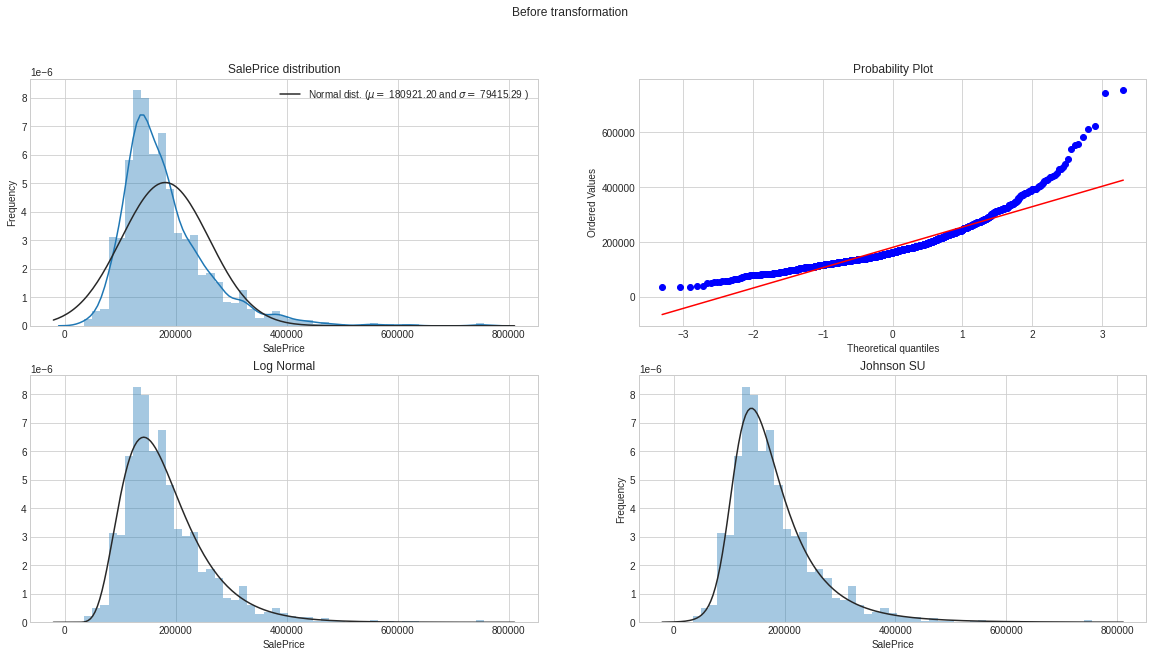

In [38]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

y = train['SalePrice']
fig = plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(train['SalePrice'] , fit=norm);


# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.subplot(2,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

plt.subplot(2,2,3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

plt.subplot(2,2,4)
plt.title('Johnson SU')
plt.ylabel('Frequency')
sns.distplot(y, kde=False, fit=stats.johnsonsu)

The 4 distributions explain SalesPrice. It is skewed to the right. In the top left distribution, the black line represents the theoretical normal distribution which does not fit the data. The blue line is the KDE and here is a helpful link: [Intro to KDE](https://machinelearningmastery.com/probability-density-estimation/)

Before we can predict the SalesPrice, we need to transform the data. The black lines are the different distributions which would "fit" the data upon transformation.

The top right is a QQ plot which is another visualization which helps to see if the distribution is normal. If it is normal, the blue points lie along the red line. Because they curve away, it shows skewness.

The Bottom Left is what the distribution would look like if we transformed the data using its Log. It's better than the Normal distribution.

The Bottom Right is the Johnson SU which is an even better fit than the log transformation.

![](https://www.safaribooksonline.com/library/view/clojure-for-data/9781784397180/graphics/7180OS_01_180.jpg)

for more info  click [Here](https://www.google.co.in/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&cad=rja&uact=8&ved=0ahUKEwi7i-jN-K7XAhWJKo8KHbIHAV4QFgguMAI&url=http%3A%2F%2Fwhatis.techtarget.com%2Fdefinition%2Fskewness&usg=AOvVaw1LJhHdq4KFEYIpfdXjOlF-)

The Johnson SU is a type of distribution. Here are some helpful links: [Introduction](https://blogs.sas.com/content/iml/2020/01/27/johnson-su-distribution.html) | [Another Intro](http://www.ntrand.com/johnson-su-distribution/) | [4 Essential functions for stats programmers](https://blogs.sas.com/content/iml/2011/10/19/four-essential-functions-for-statistical-programmers.html) | [4 Parameters (Funky Symbols) Explained](http://www.ntrand.com/ntjohnsonsuparam/)

I want to see a general overview of the correlated features.

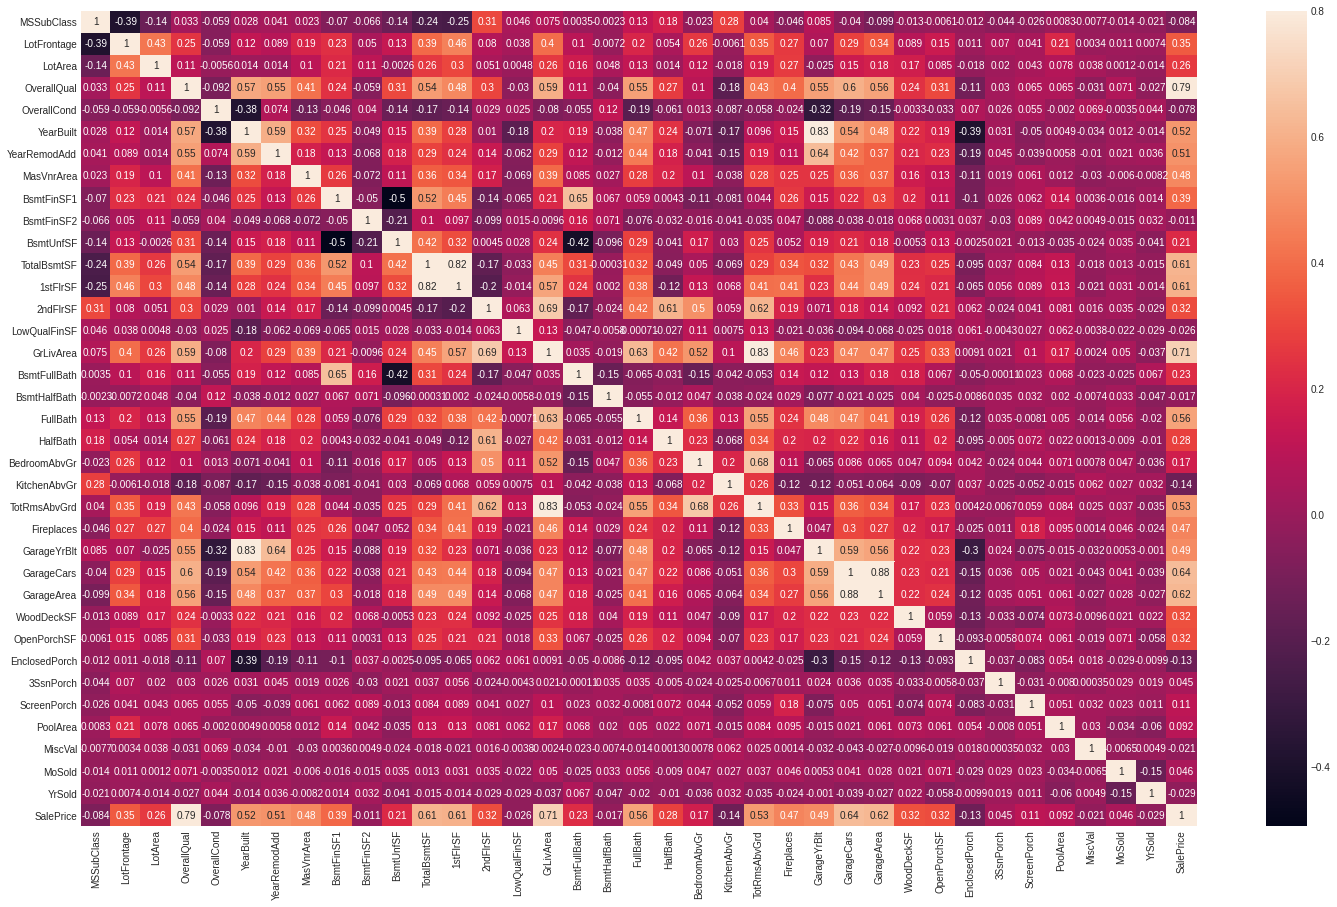

In [39]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corrmat, vmax=.8, annot=True);

Generally speaking, a Pearson Correlation Coefficient of .5 is moderately positive. I'll filter the features by that metric.
![](http://intranet.tdmu.edu.ua/data/kafedra/internal/distance/classes_stud/english/1course/Medical%20statistics/08.%20Types%20of%20correlation.files/image013.gif)

[Text(0, 0.5, 'OverallQual'),
 Text(0, 1.5, 'YearBuilt'),
 Text(0, 2.5, 'YearRemodAdd'),
 Text(0, 3.5, 'TotalBsmtSF'),
 Text(0, 4.5, '1stFlrSF'),
 Text(0, 5.5, 'GrLivArea'),
 Text(0, 6.5, 'FullBath'),
 Text(0, 7.5, 'TotRmsAbvGrd'),
 Text(0, 8.5, 'GarageCars'),
 Text(0, 9.5, 'GarageArea'),
 Text(0, 10.5, 'SalePrice')]

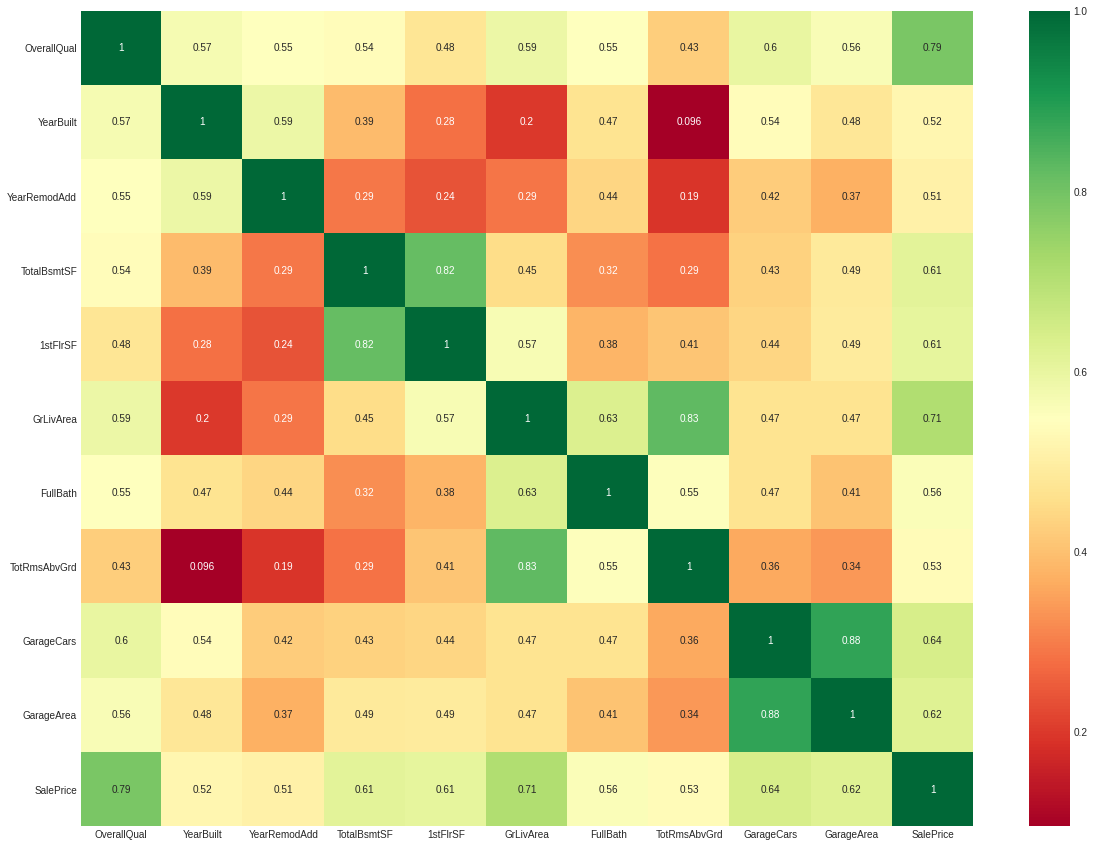

In [40]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(20,15))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g.set_yticklabels(g.get_yticklabels(), rotation=360)

Many of the features are correlated with each other.
OverallQual and GrLivArea are highly correlated with our target variable of SalePrice.

"Quantitative" is the list of columns that are numeric. "Qualitative" is the list of columns that are objects or strings. 

In [41]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
# quantitative.remove('SalePrice')
# quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

I test for normality.

In [42]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


Like our target variable Salesprice, none of our numerical features are normally distributed. They will need to be transformed for effetive modeling.

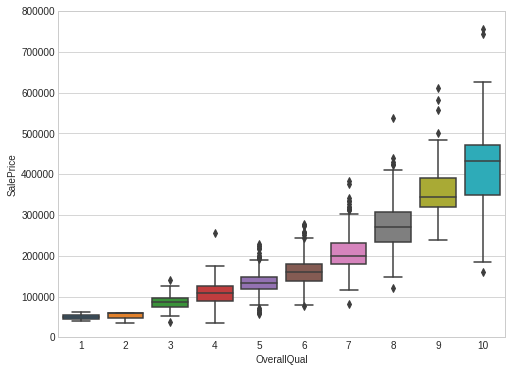

In [48]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

There is definately an increasing relationship between SalePrice and OverallQual.

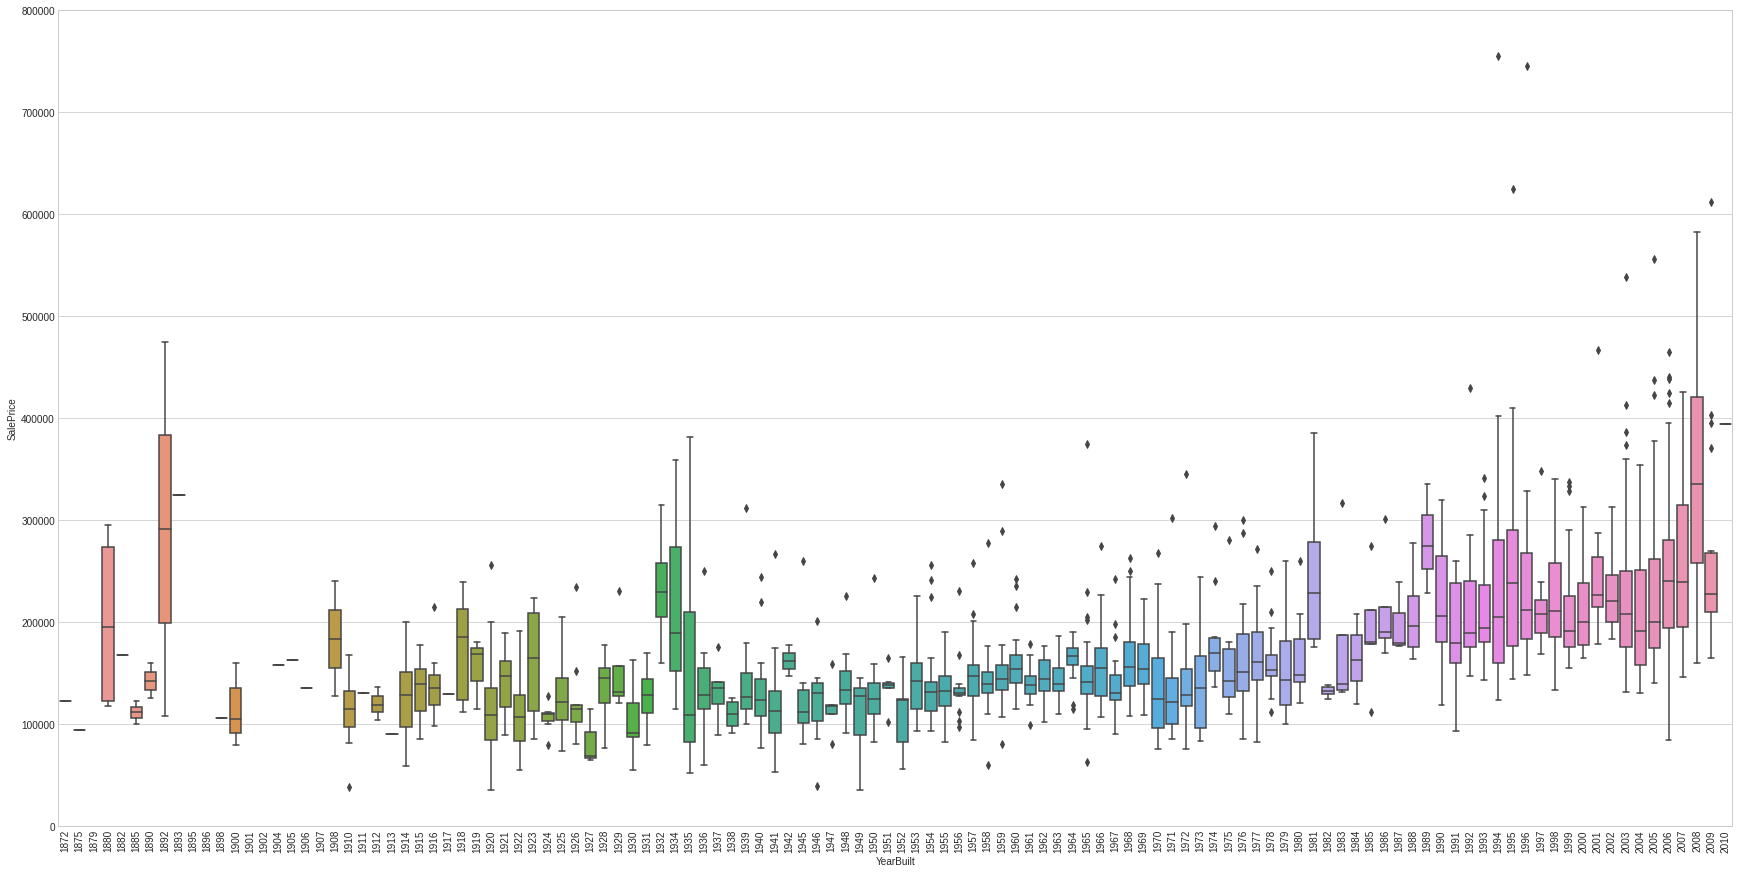

In [47]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

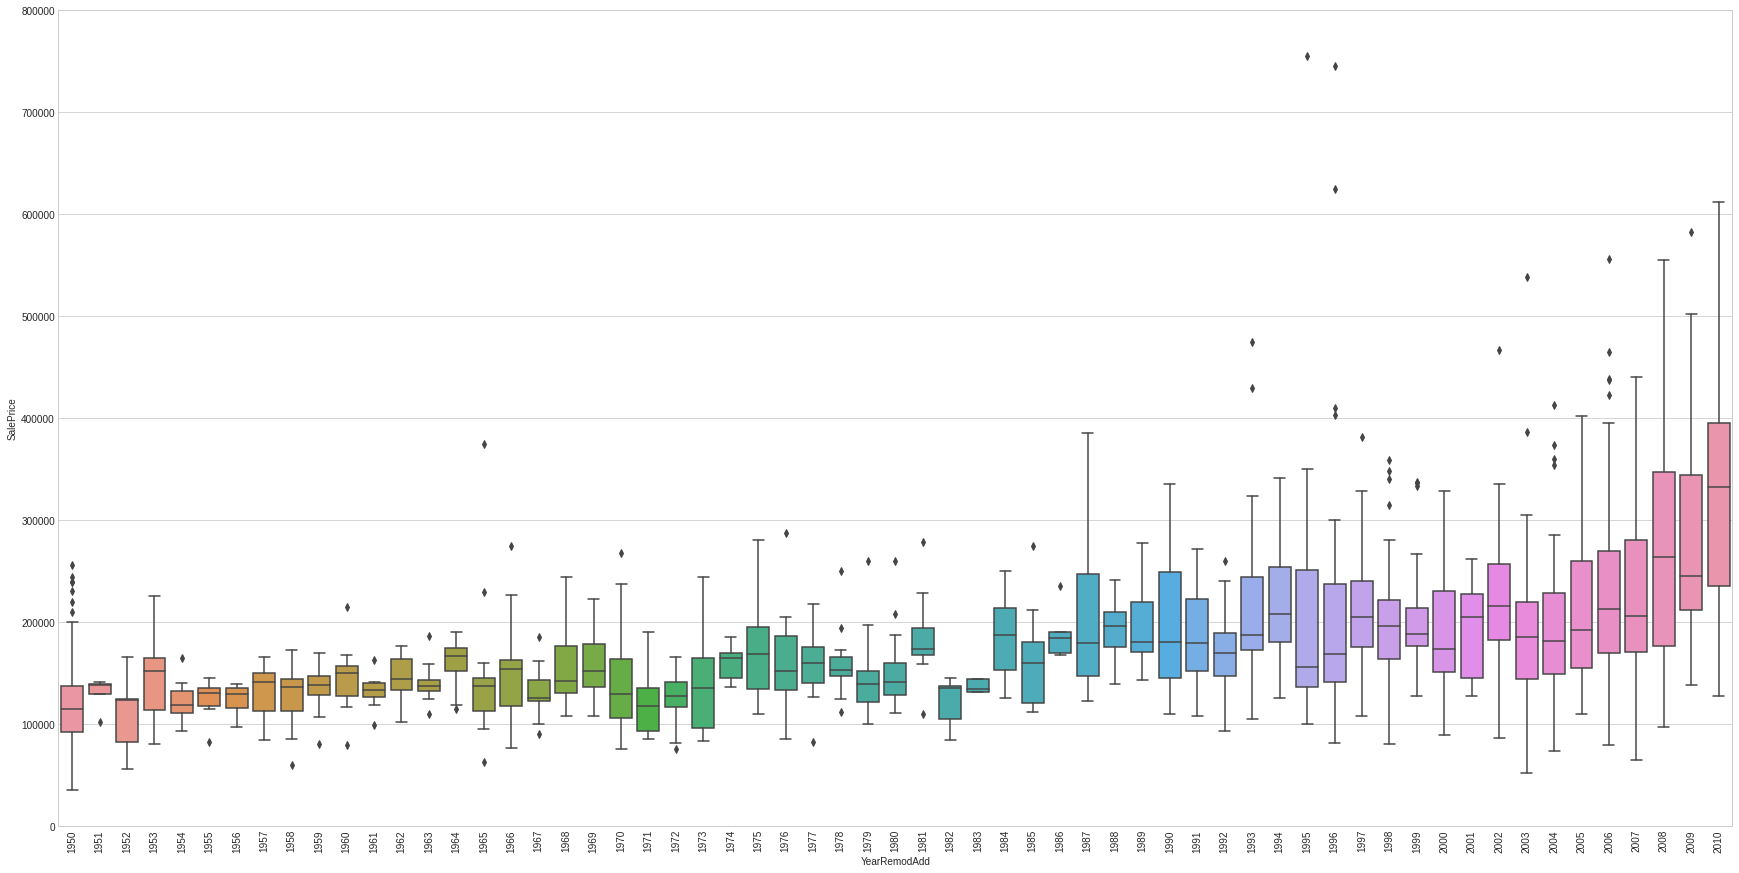

In [49]:
var = 'YearRemodAdd'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [50]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Error in callback <function flush_figures at 0x7f70b3b04ea0> (for post_execute):


KeyboardInterrupt: ignored

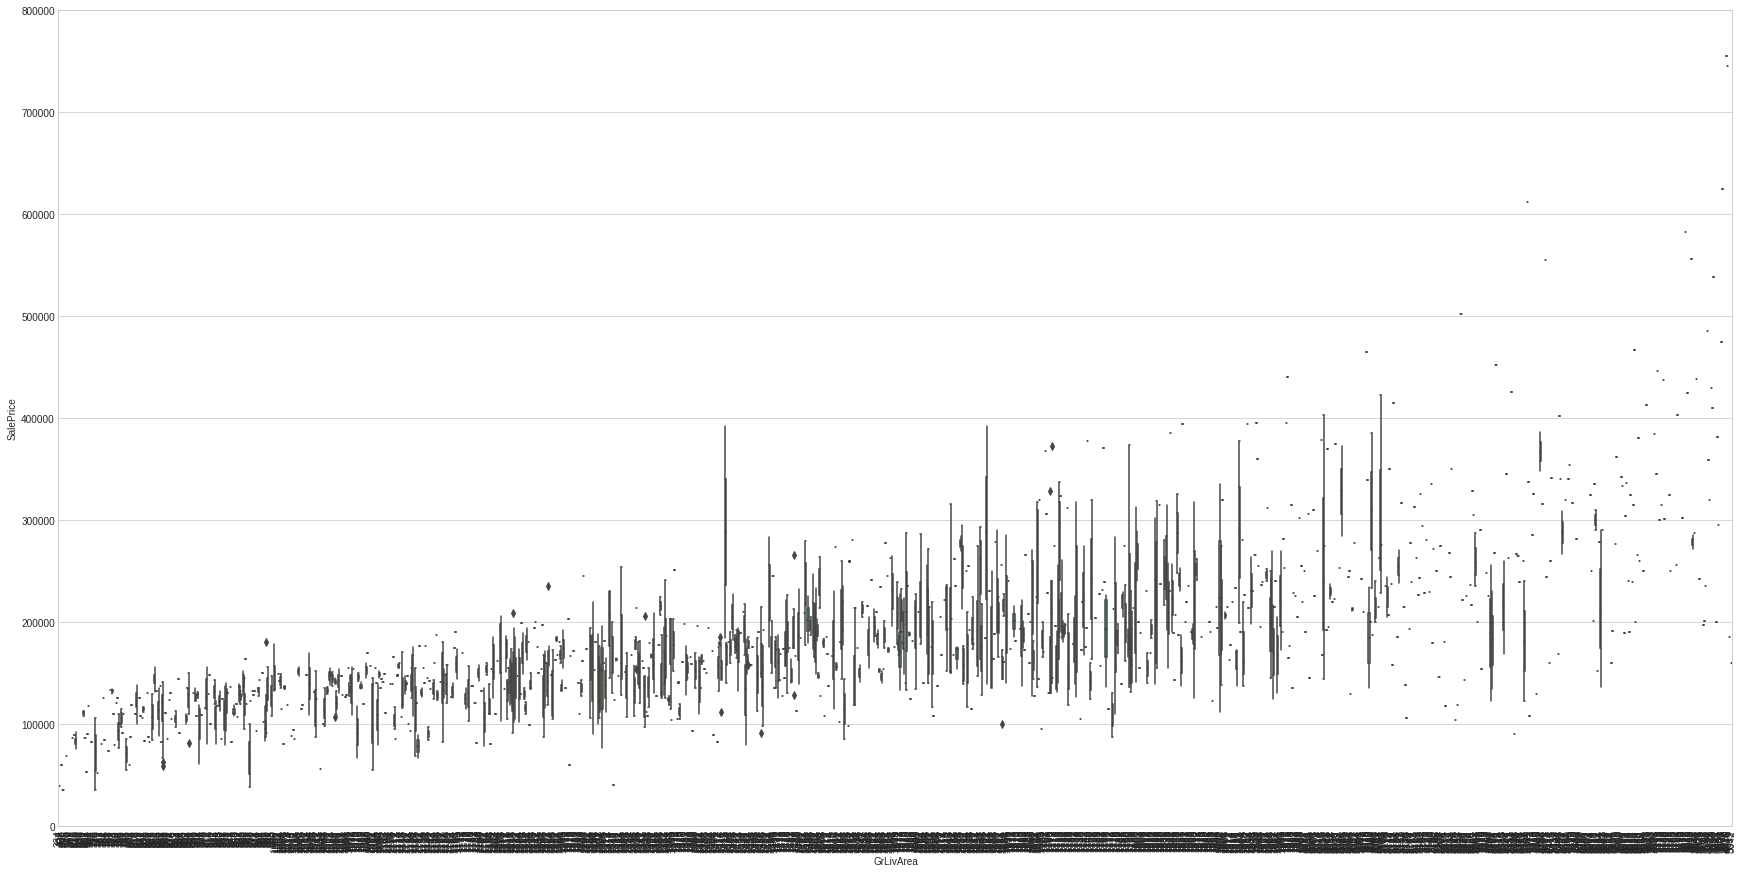

In [51]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

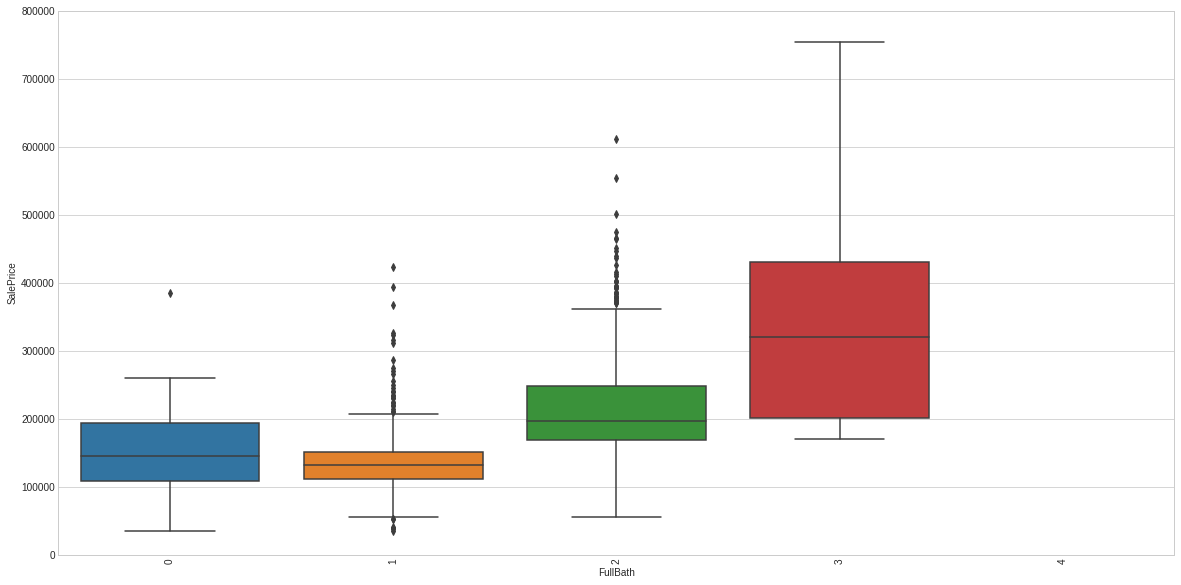

In [54]:
var = 'FullBath'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

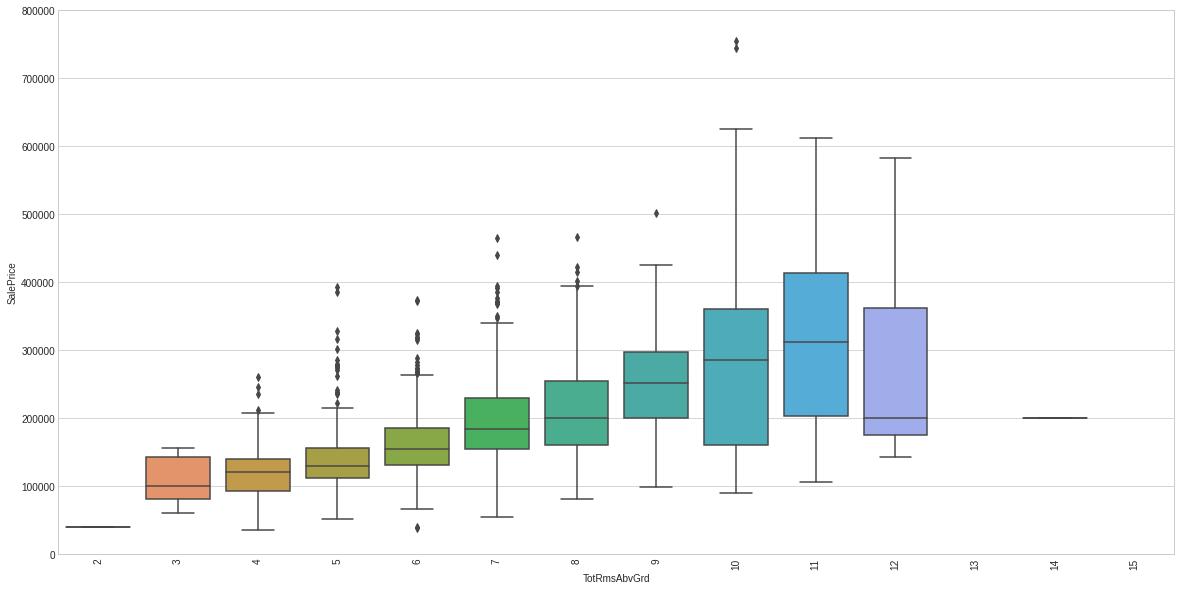

In [56]:
var = 'TotRmsAbvGrd'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

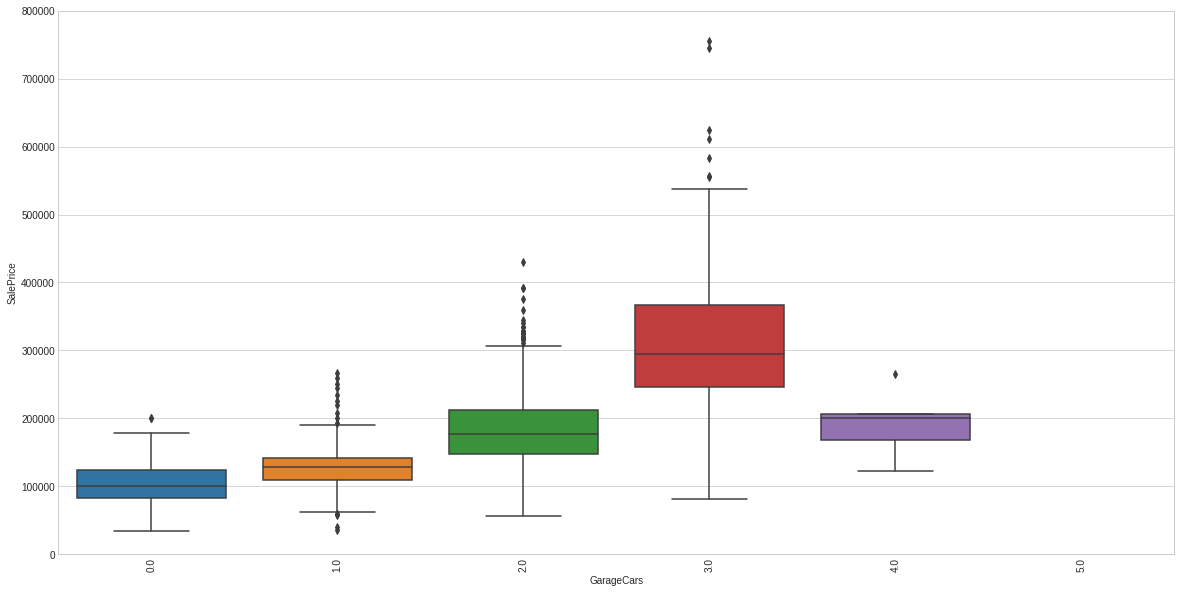

In [57]:
var = 'GarageCars'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [60]:
numeric_features = train.select_dtypes(include=[np.number])
year_feature = [feature for feature in numeric_features if 'Yr' in feature or 'Year' in feature]
discrete_feature=[feature for feature in numeric_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']]


In [62]:
for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

AttributeError: ignored